In [3]:
import holidays #starteから共有不可
import sys,os
import dill
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
sys.path.append(os.path.join(os.path.dirname("__file__"), '../../common/'))
INDATA_PATH = '../input/'
COMMON_PATH = '../../common/'
PREPRO_PATH = '../prepro/'

from  plot_tool import Fig
from  common import common as com

%load_ext autoreload
%autoreload 2
from  plot_tool import Ax
%aimport 

%load_ext autoreload
%autoreload 2
from  plot_tool import Fig
%aimport 

Modules to reload:
all-except-skipped

Modules to skip:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [5]:
# Setted another notebook
dill.load_session(PREPRO_PATH+'starter.pkl')

In [6]:
def get_ema(_x, _period):
    ema = np.zeros(len(_x))
    ema[:] = np.nan # NaN で一旦初期化
    ema[_period-1] = _x[:_period].mean() # 最初だけ単純移動平均で算出
    
    for _day in range(_period, len(_x)):
        ema[_day] = ema[_day-1] + (_x[_day] - ema[_day-1]) * (2/ (_period + 1))
    
    return ema

In [7]:
def plot_by_key(ls_key,_column,name,ema_day = 30,rma_day = 30):
    fg = Fig(figsize=(15,5*len(ls_key)))
    for _key in ls_key:
        ax = fg.fig.add_subplot(len(ls_key), 1, ls_key.index(_key)+1)
        ax = Ax(fig=fg,ax=ax)
        df_filtered = df_validation[df_validation[_column] == _key]
        df_filtered = df_filtered[ls_col_d].sum()

        df_filtered = pd.DataFrame(df_filtered)
        df_filtered = df_filtered.reset_index()
        df_filtered = df_filtered.replace({'index':dct_d_to_dt})
        df_filtered = df_filtered.set_index('index')


        _c = ax.tab10(ls_key.index(_key
                                  )+1)
        ax.plot_line(
            df_filtered.index,
            df_filtered[0],
            'Daily',
            color= _c,
            alpha=0.3
        )

        ax.plot_line(
            df_filtered.index,
            get_ema(df_filtered[0],ema_day),
            "EMA",
            color='black',
            linestyle=':'
        )


        ax.plot_line(
            df_filtered.index,
            df_filtered[0].rolling(rma_day).mean(),
            "RMA",
            color=_c,
            linestyle=':'
        )


        df_filtered = df_filtered.resample(rule = 'M').sum()

        ax2 = Ax(fig=fg,ax=ax.twinx())
        ax2.plot_line(
            df_filtered.index,
            df_filtered[0],
            'Monthly Sum',
            color= _c
        )

        ax.xticklabelsDateFormatter('%Y-%m-%d')
        ax.set_title(_key)

        ax.grid('x',True,color='black',linestyle='--')
        ax.grid('y',True,color='black',linestyle='--')

        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()

        ax.legend(
            handles=h1+h2, 
            labels=l1+l2,
            loc='best')
    fg.subtitle('Sum sale by '+name+'(Separated)')

In [8]:

def plot_by_key_merged(ls_key,name,_column,is_m,is_sp=False):
    fg = Fig(figsize=(15,4))
    ax = fg.fig.add_subplot(1, 1, 1)
    ax = Ax(fig=fg,ax=ax)
    for _key in ls_key:

        if _column == 'd':
            df_filtered = copy.copy(df_validation)
            df_filtered = df_filtered[dct_ls_col_d_in_weekday[_key]].sum()
        else:
            df_filtered = df_validation[df_validation[_column] == _key]
            df_filtered = df_filtered[ls_col_d].sum()

        df_filtered = pd.DataFrame(df_filtered)
        df_filtered = df_filtered.reset_index()
#         print(df_filtered)
        df_filtered = df_filtered.replace({'index':dct_d_to_dt})
        df_filtered = df_filtered.set_index('index')

        if is_m & ~is_sp:
            df_filtered = df_filtered.resample(rule = 'M').sum()
        

        ax.plot_line(
            df_filtered.index,
            df_filtered[0].rolling(8).mean(),
            _key,color=ax.tab10(ls_key.index(_key))
        )
        
#         if is_sp:

        ax.xticklabelsDateFormatter('%Y-%m-%d')

        ax.grid('x',True,color='black',linestyle='--')
        ax.grid('y',True,color='black',linestyle='--')

    ax.set_title('Sum sale by '+name)
    ax.legend(loc='upper right')


SNAP: https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/135883#775411

## 全体

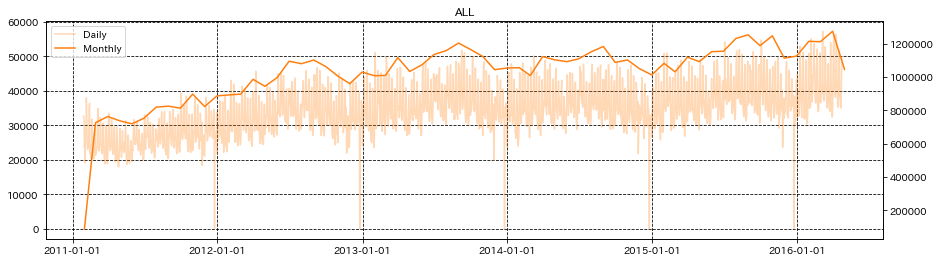

In [9]:

fg = Fig(figsize=(15,4))


ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_dt})
df_filtered = df_filtered.set_index('index')

#     df_filtered = df_filtered.resample(rule = 'M').sum()
_c = ax.tab10(1)
ax.plot_line(
    df_filtered.index,
    df_filtered[0],
    'Daily',
    color= _c,
    alpha=0.3
)

df_filtered = df_filtered.resample(rule = 'M').sum()

ax2 = Ax(fig=fg,ax=ax.twinx())
ax2.plot_line(
    df_filtered.index,
    df_filtered[0],
    'Monthly',
    color= _c
)

ax.xticklabelsDateFormatter('%Y-%m-%d')
ax.set_title("ALL")

ax.grid('x',True,color='black',linestyle='--')
ax.grid('y',True,color='black',linestyle='--')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax.legend(
    handles=h1+h2, 
    labels=l1+l2,
    loc='best')

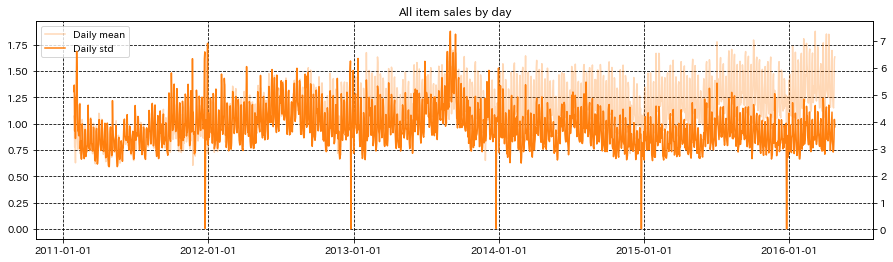

In [10]:

fg = Fig(figsize=(15,4))


ax = fg.fig.add_subplot(1, 1, 1)
ax = Ax(fig=fg,ax=ax)
df_filtered = copy.copy(df_validation)

df_filtered = copy.copy(df_validation)
df_filtered = pd.concat([
    pd.DataFrame(df_filtered[ls_col_d].mean(),columns=['mean']),
    pd.DataFrame(df_filtered[ls_col_d].std(),columns=['std'])],
    axis=1
)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_dt})
df_filtered = df_filtered.set_index('index')


_c = ax.tab10(1)
ax.plot_line(
    df_filtered.index,
    df_filtered['mean'],
    'Daily mean',
    color= _c,
    alpha=0.3
)


ax2 = Ax(fig=fg,ax=ax.twinx())
ax2.plot_line(
    df_filtered.index,
    df_filtered['std'],
    'Daily std',
    color= _c
)

ax.xticklabelsDateFormatter('%Y-%m-%d')
ax.set_title("All item sales by day")

ax.grid('x',True,color='black',linestyle='--')
ax.grid('y',True,color='black',linestyle='--')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax.legend(
    handles=h1+h2, 
    labels=l1+l2,
    loc='best')

# Item

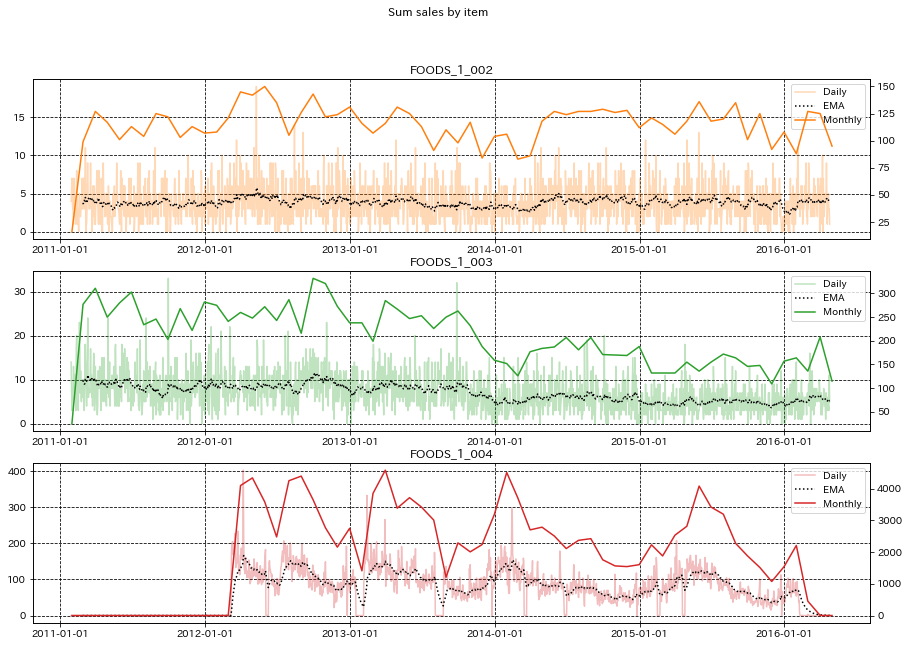

In [11]:

fg = Fig(figsize=(15,10))

ema_day  = 30
for _id in range(1,4):
    ax = fg.fig.add_subplot(3, 1, _id)
    ax = Ax(fig=fg,ax=ax)

    df_filtered = copy.copy(df_validation.loc[df_validation.item_id == ls_item[_id]])
    df_filtered = df_filtered[ls_col_d].sum()

    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_dt})
    df_filtered = df_filtered.set_index('index')

    _c = ax.tab10(_id)
    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        'Daily',
        color= _c,
        alpha=0.3
    )
    
    ax.plot_line(
        df_filtered.index,
        get_ema(df_filtered[0],ema_day),
        "EMA",
        color='black',
        linestyle=':'
    )

    df_filtered = df_filtered.resample(rule = 'M').sum()

    ax2 = Ax(fig=fg,ax=ax.twinx())
    ax2.plot_line(
        df_filtered.index,
        df_filtered[0],
        'Monthly',
        color= _c
    )
    


    ax.xticklabelsDateFormatter('%Y-%m-%d')
    ax.set_title(ls_item[_id])

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    ax.legend(
        handles=h1+h2, 
        labels=l1+l2,
        loc='best')
fg.subtitle('Sum sales by item')

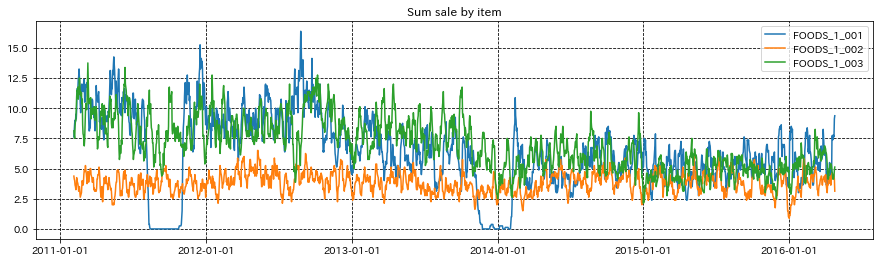

In [12]:
plot_by_key_merged(ls_item[:3],'item','item_id',is_m=False)

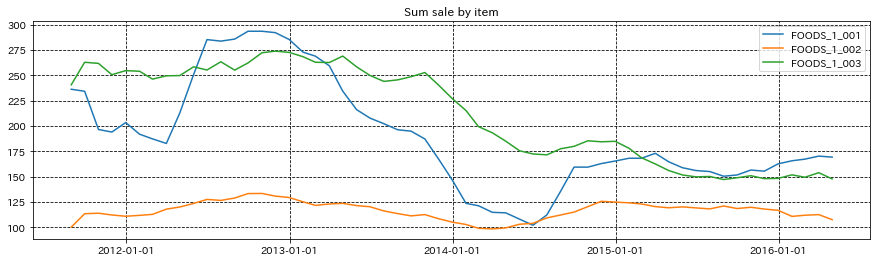

In [13]:
plot_by_key_merged(ls_item[:3],'item','item_id',is_m=True)

In [14]:
"""
必ずしも商品が全店舗に置かれない
"""
df_filtered = copy.copy(df_price)
df_filtered = df_filtered.groupby(['item_id','date'])['sell_price'].agg(["count", "mean", "std"])

df_filtered[df_filtered["count"] !=10]

count      mean       std
item_id         date                                 
FOODS_1_001     2011-02-04      9  2.000000  0.000000
FOODS_1_002     2011-02-04      9  7.921875  0.134155
FOODS_1_005     2011-02-04      9  2.972656  0.100281
                2011-02-11      9  2.972656  0.100281
                2011-02-18      9  2.972656  0.100281
...                           ...       ...       ...
HOUSEHOLD_2_516 2011-02-04      6  5.941406  0.000000
                2011-02-11      7  5.941406  0.000000
                2011-02-18      9  5.941406  0.000000
                2011-02-25      9  5.941406  0.000000
                2011-03-04      9  5.941406  0.000000

[126462 rows x 3 columns]

In [75]:
df_filtered = copy.copy(df_price.loc[df_price.item_id == ls_item[_id]])
df_filtered[df_filtered.date==datetime.datetime(2014,8,15)]
# set(df_filtered.date)

store_id      item_id  wm_yr_wk  sell_price       date
369719      CA_1  FOODS_1_004        33    1.780273 2014-08-15
1066080     CA_2  FOODS_1_004        33    1.959961 2014-08-15
1701419     CA_3  FOODS_1_004        33    1.780273 2014-08-15
2386079     CA_4  FOODS_1_004        33    1.780273 2014-08-15
3077919     TX_1  FOODS_1_004        33    1.959961 2014-08-15
3778825     TX_2  FOODS_1_004        33    1.780273 2014-08-15
4477607     TX_3  FOODS_1_004        33    1.780273 2014-08-15
5169112     WI_1  FOODS_1_004        33    1.780273 2014-08-15
5832887     WI_2  FOODS_1_004        33    1.780273 2014-08-15
6513528     WI_3  FOODS_1_004        33    1.780273 2014-08-15

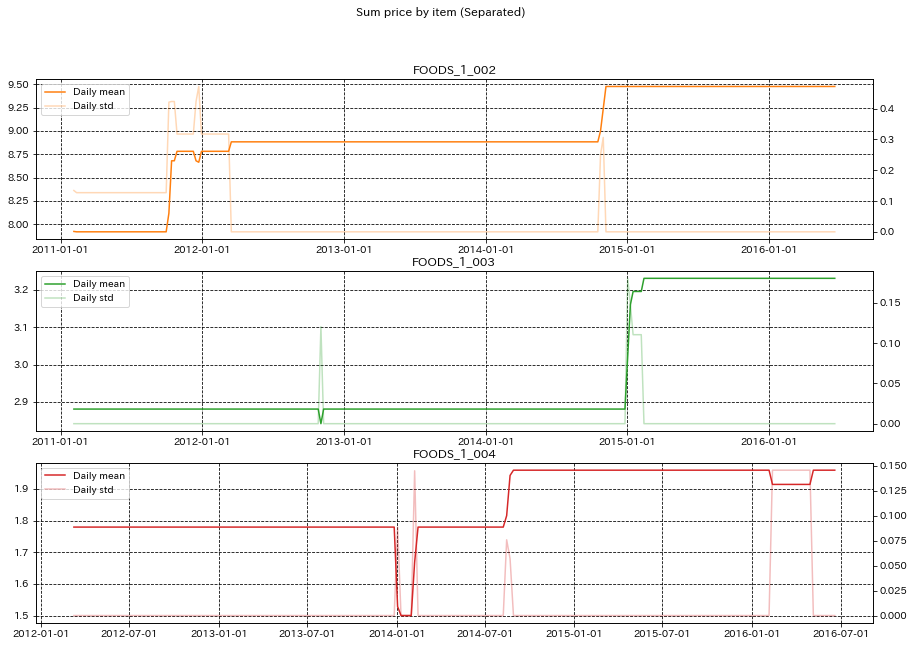

In [48]:

fg = Fig(figsize=(15,10))

ema_day  = 30

def drop_zero_mean(_row):
    _row = _row[(_row!=0)&(~pd.isnull(_row))]
    return _row.mean()

def drop_zero_std(_row):
    _row = _row[(_row!=0)&(~pd.isnull(_row))]
    return _row.std()
    
for _id in range(1,4):
    ax = fg.fig.add_subplot(3, 1, _id)
    ax = Ax(fig=fg,ax=ax)

    df_filtered = copy.copy(df_price.loc[df_price.item_id == ls_item[_id]])
    df_filtered = df_filtered.groupby('date')['sell_price'].agg([drop_zero_mean,drop_zero_std]).rename(columns={"drop_zero_mean": "mean", "drop_zero_std":"std"})
    _c = ax.tab10(_id)
    ax.plot_line(
        df_filtered.index,
        df_filtered['mean'],
        'Weekly mean',
        color= _c
    )
    

    ax2 = Ax(fig=fg,ax=ax.twinx())
    ax2.plot_line(
        df_filtered.index,
        df_filtered['std'],
        'Weekly std',
        color= _c,
        alpha=0.3
    )
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    ax.set_title(ls_item[_id])

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')

    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    ax.legend(
        handles=h1+h2, 
        labels=l1+l2,
        loc='best')
    
fg.subtitle('Sum price by item (Separated)')

# Special day and week day

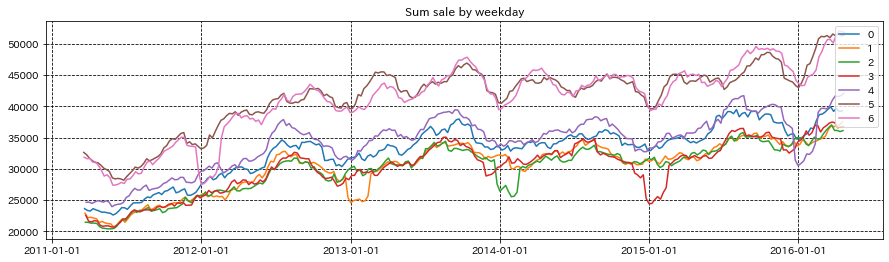

In [16]:
plot_by_key_merged(ls_weekday,'weekday','d',is_m=False)

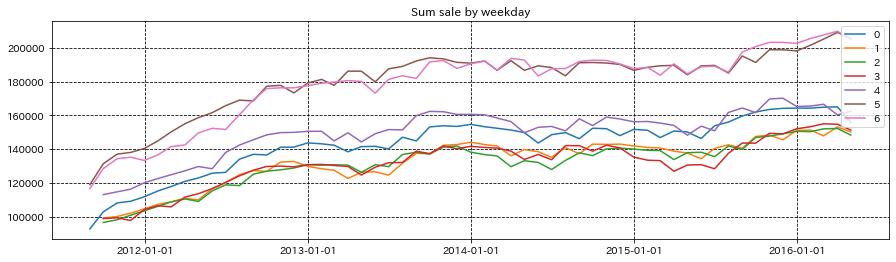

In [17]:
plot_by_key_merged(ls_weekday,'weekday','d',is_m=True)

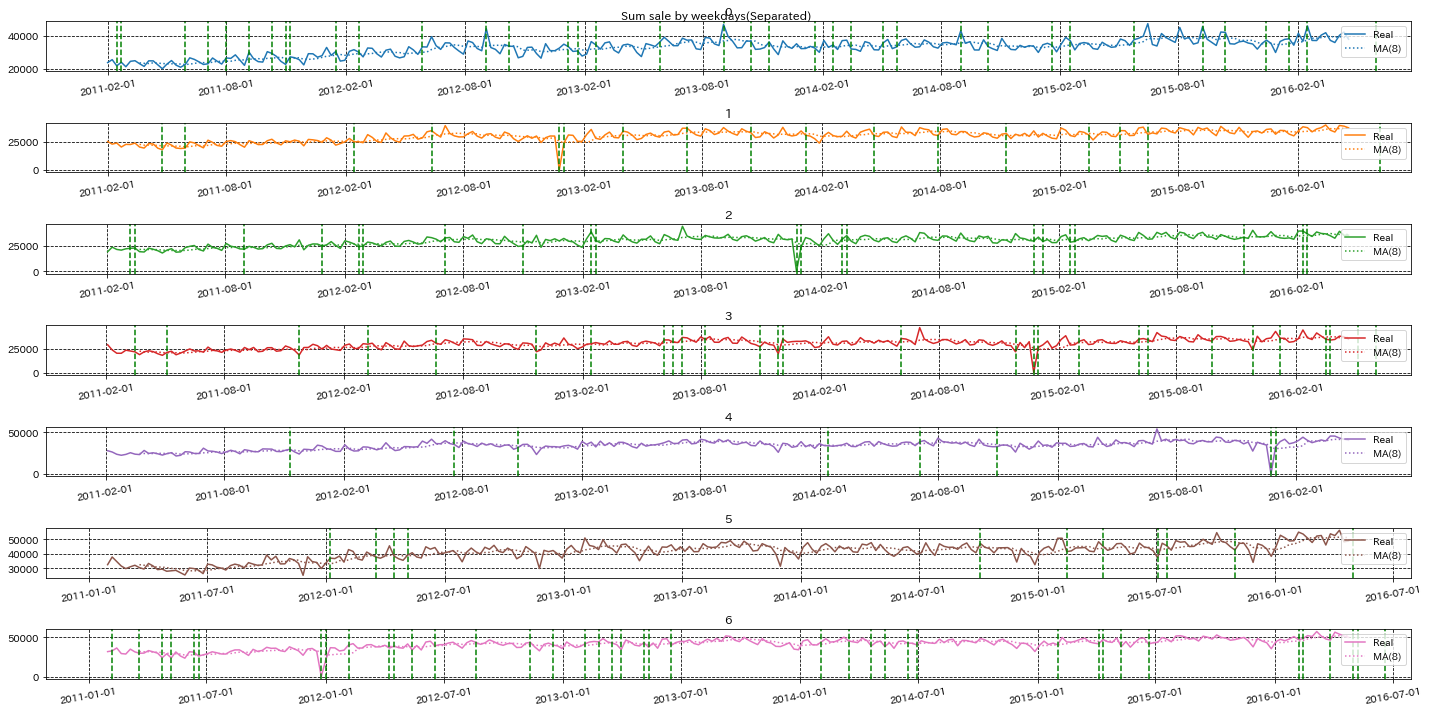

In [18]:

fg = Fig(figsize=(20,10))
fg.subtitle('Sum sale by weekdays(Separated)')

for _wday in ls_weekday:
    ax = fg.fig.add_subplot(len(ls_weekday), 1, ls_weekday.index(_wday)+1)
    ax = Ax(fig=fg,ax=ax)
    df_filtered = copy.copy(df_validation)
    df_filtered = df_filtered[dct_ls_col_d_in_weekday[_wday]].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_dt})
    df_filtered = df_filtered.set_index('index')
    
#     df_filtered = df_filtered.resample(rule = 'M').sum()
    _c = ax.tab10(ls_weekday.index(ls_weekday.index(_wday)))
    ax.plot_line(
        df_filtered.index,
        df_filtered[0],
        "Real",
        color=_c,
        markerfacecolor = _c
    )
    
    ax.plot_line(
        df_filtered.index,
        df_filtered[0].rolling(8).mean(),
        "MA(8)",
        color=_c,
        linestyle=':',
        markerfacecolor = _c
    )
    

    for _dt in dct_dt_to_spName.keys():
        if _dt.weekday() == _wday:
            ax.ax.axvline(x=_dt, ls='--',color = 'g')
#         print(_dt)
        
    
    ax.xticklabelsDateFormatter('%Y-%m-%d')
    
    ax.set_title(_wday)
    ax.grid('y',True,color='black',linestyle='--')
    ax.grid('x',True,color='black',linestyle='--',)
    
    ax.datexgrid('major',locator=mdates.MonthLocator(interval=6))
#     ax.datexgrid('minor',locator=mdates.MonthLocator(interval=2))
    
    ax.tick_params('x',labelrotation=10)
    ax.legend(loc='upper right')

fg.adjust()

#     break;


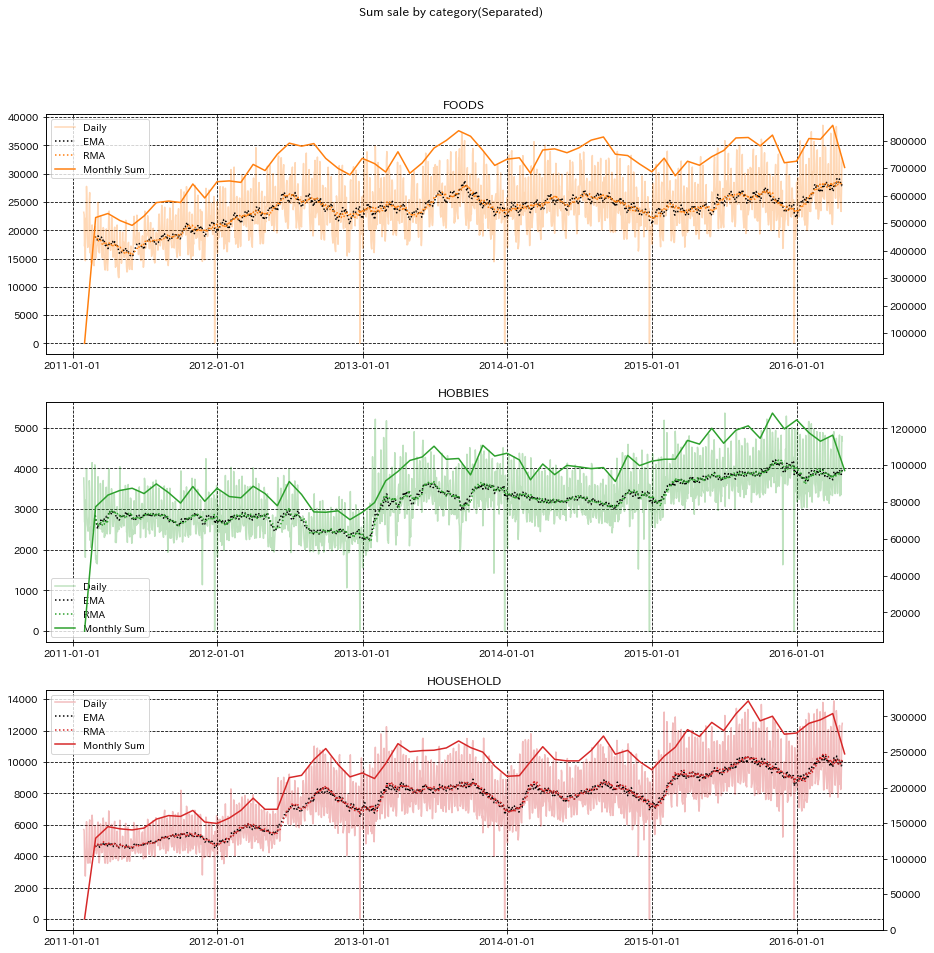

In [19]:
plot_by_key(ls_cat,"cat_id","category",ema_day = 30,rma_day = 30)

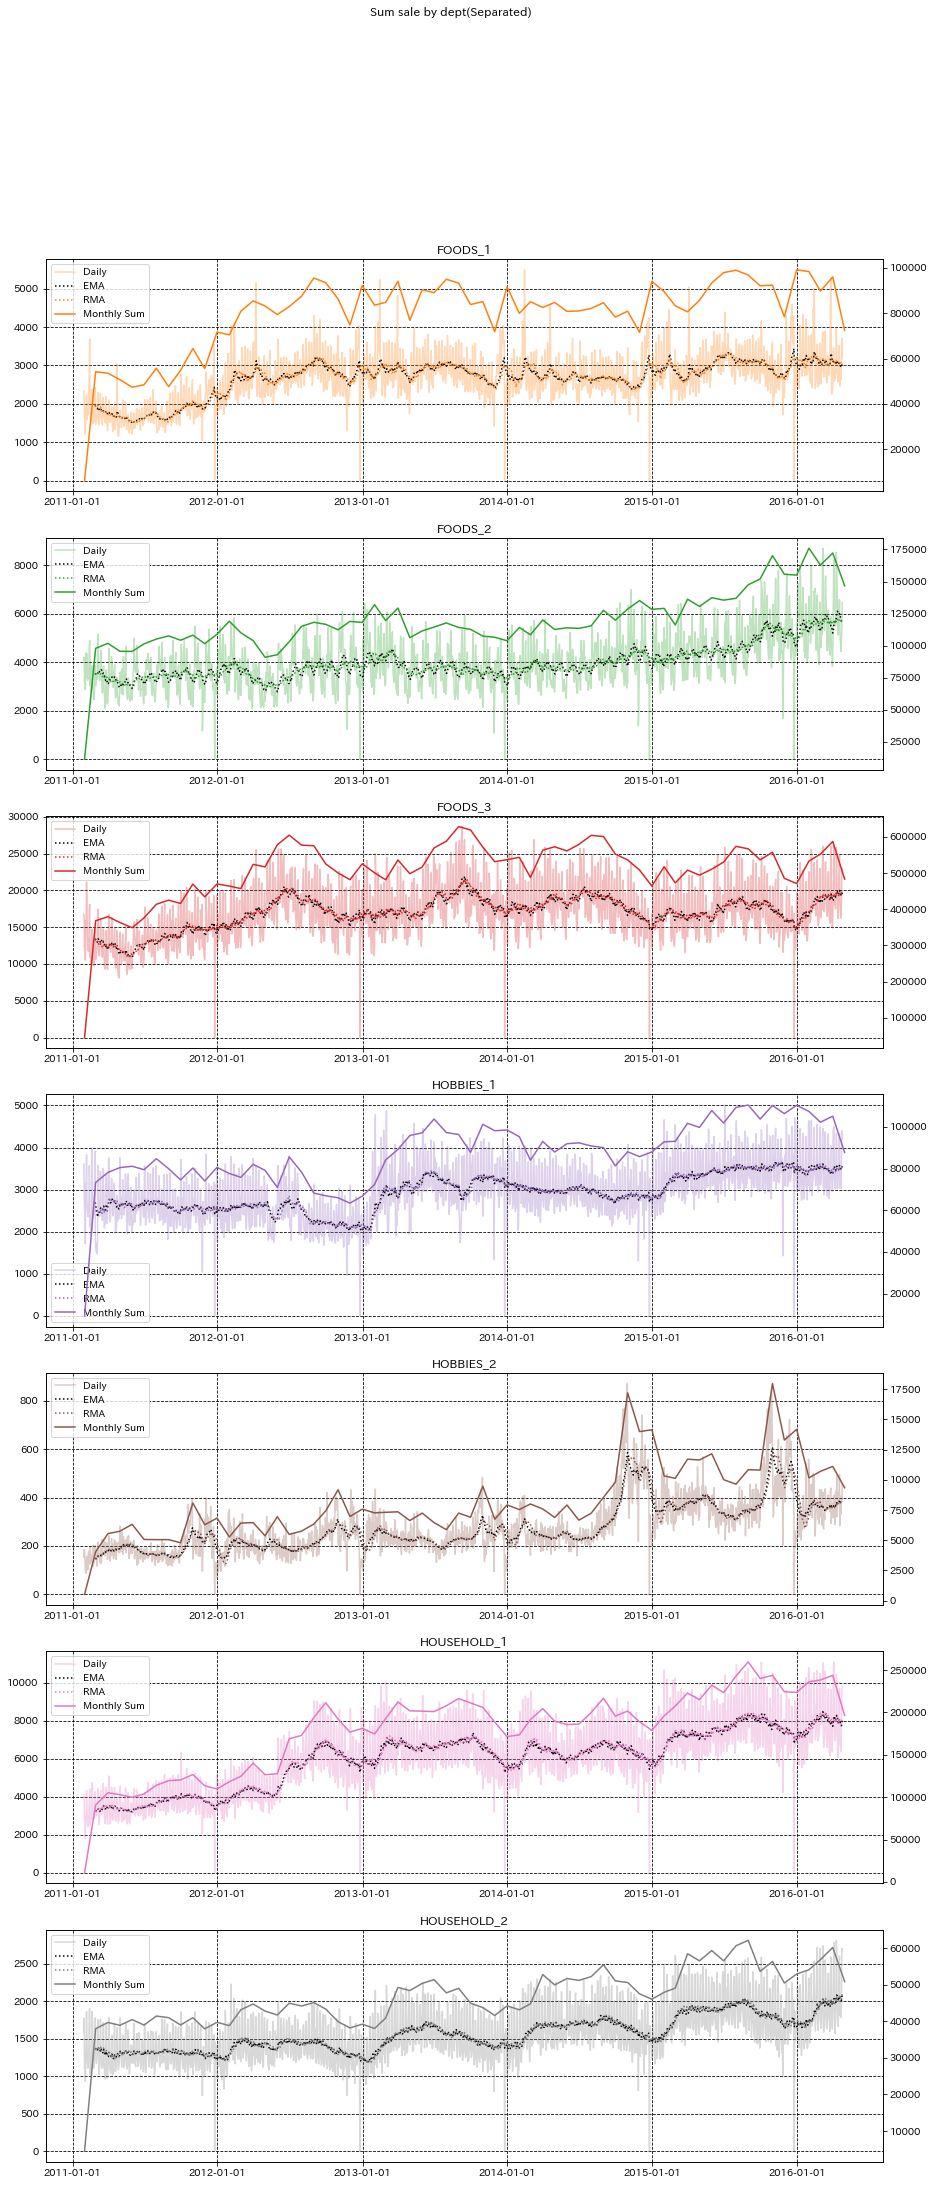

In [20]:
plot_by_key(ls_dept,"dept_id","dept",ema_day = 30,rma_day = 30)

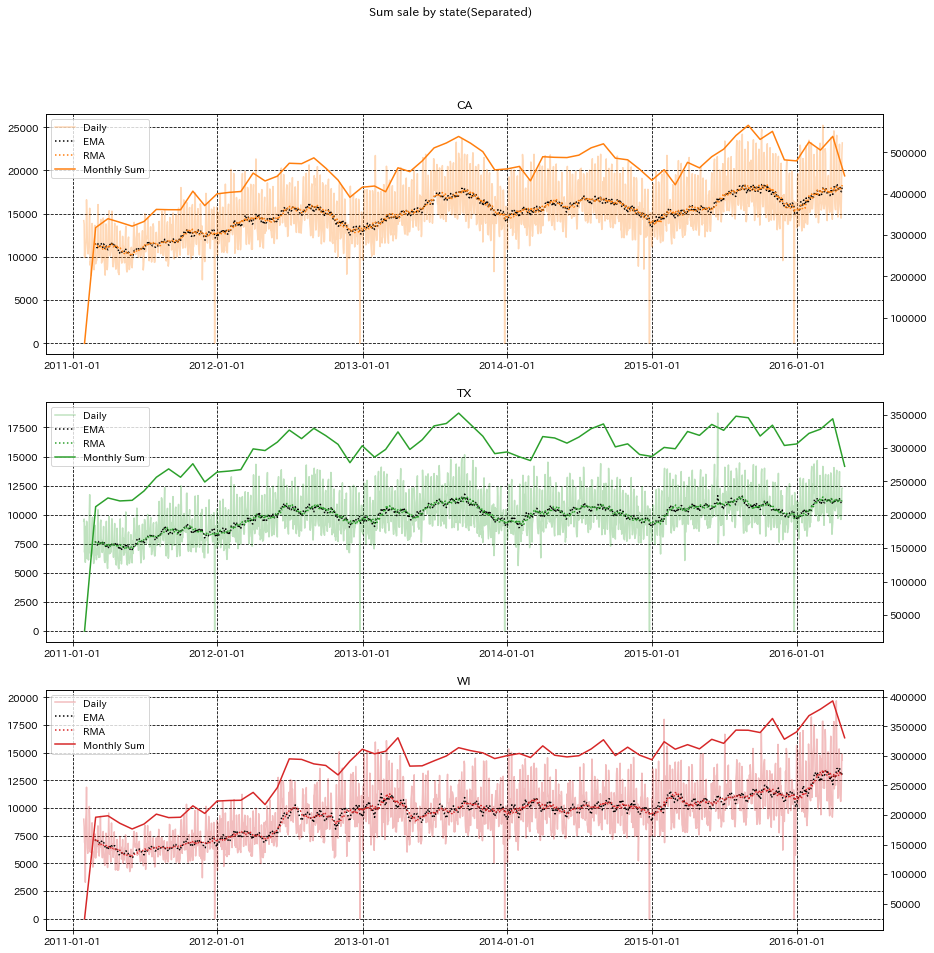

In [21]:
plot_by_key(ls_state,"state_id","state",ema_day = 30,rma_day = 30)

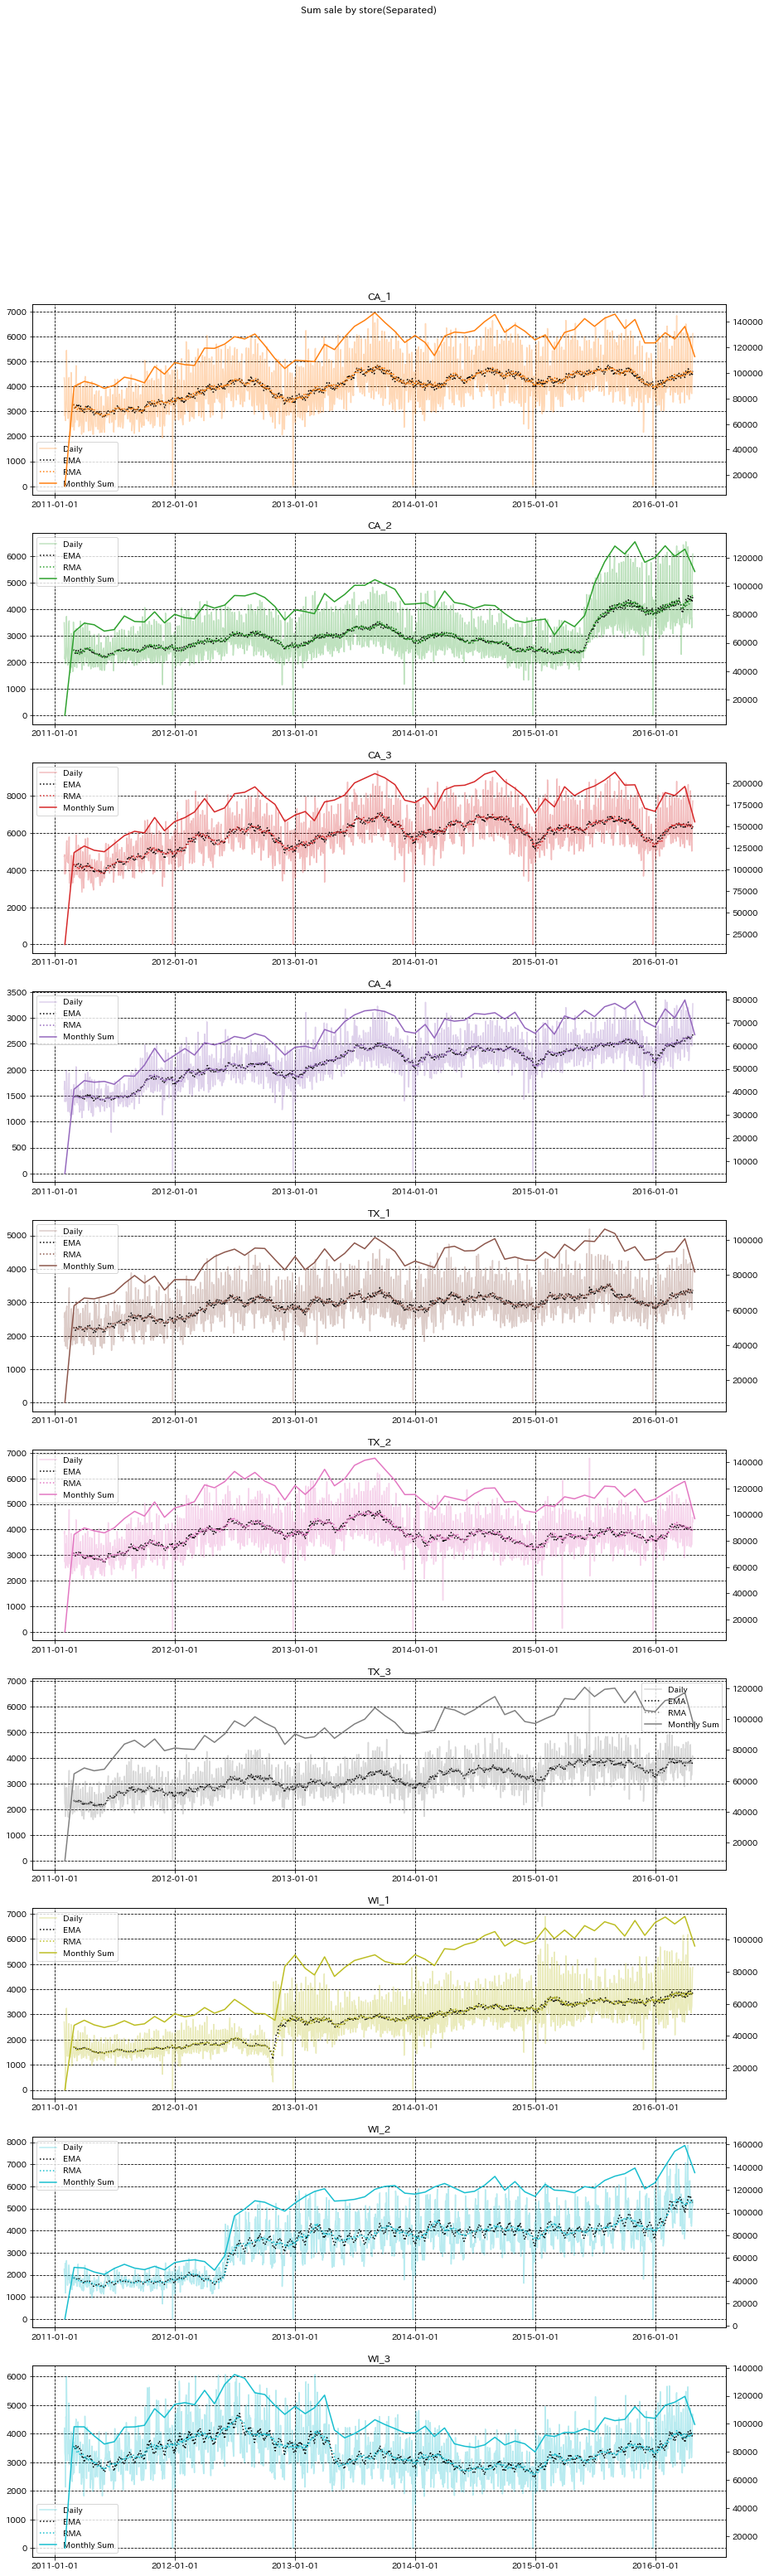

In [22]:
plot_by_key(ls_store,"store_id","store",ema_day = 30,rma_day = 30)

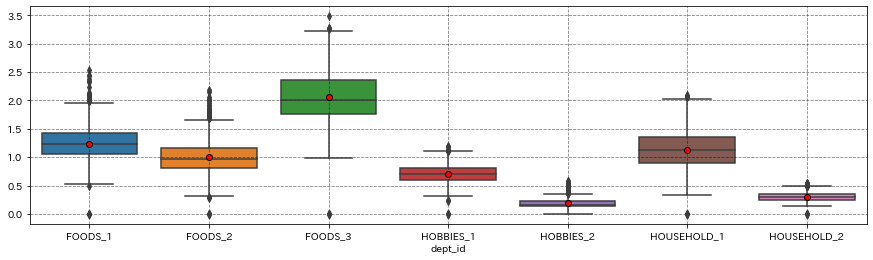

In [23]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))


data = df_validation.groupby('dept_id').mean().T
ax.plot_box(data,has_mean=True)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    


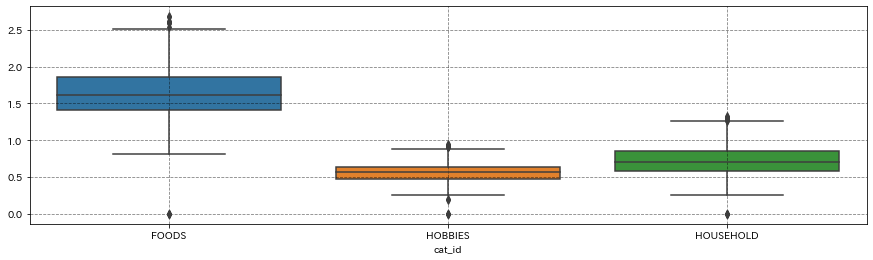

In [24]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))

data = df_validation.groupby('cat_id').mean().T
ax.plot_box(data)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    

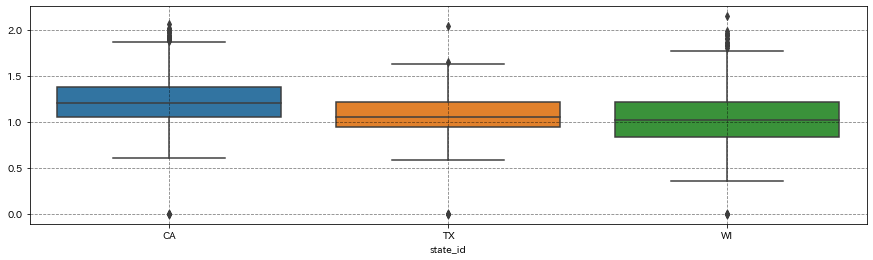

In [25]:

fg = Fig(figsize=(15,4))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(1, 1, 1))

data = df_validation.groupby('state_id').mean().T
ax.plot_box(data)

ax.grid('x',True,color='black',linestyle='--',alpha=0.5)
ax.grid('y',True,color='black',linestyle='--',alpha=0.5)    

## SNAP

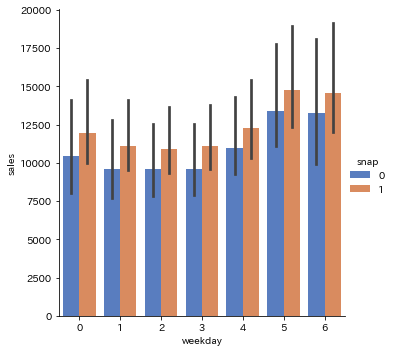

In [216]:
df_stateSales = df_validation.groupby(['state_id'])[ls_col_d].sum()
df_stateSales = pd.DataFrame(df_stateSales.stack(),columns=['sales'])
df_stateSales.index.names= [df_stateSales.index.names[0],'d']
df_stateSales = df_stateSales.reset_index()
df_stateSales['date'] = df_stateSales['d'].apply(lambda x : dct_d_to_dt[x])
del df_stateSales['d']

df_calendarAbbr = df_calendar[["date","snap_CA","snap_TX","snap_WI"]].rename(columns={"snap_CA":"CA","snap_TX":"TX","snap_WI":"WI"})
df_calendarAbbr = df_calendarAbbr.set_index('date')
df_calendarAbbr = pd.DataFrame(df_calendarAbbr.stack(),columns=['snap'])
df_calendarAbbr.index.names= [df_calendarAbbr.index.names[0],'state_id']
df_calendarAbbr = df_calendarAbbr.reset_index()

df_stateSales = pd.merge(df_stateSales,df_calendarAbbr,on=['date','state_id'],how='left')
df_stateSales['weekday'] = df_stateSales.date.dt.weekday

df_stateSalesBySnap = pd.DataFrame(df_stateSales.groupby(['state_id','weekday','snap'])['sales'].agg('mean'))
sns.catplot(x="weekday", y="sales", hue="snap", data=df_stateSalesBySnap.reset_index(), kind="bar", palette="muted")

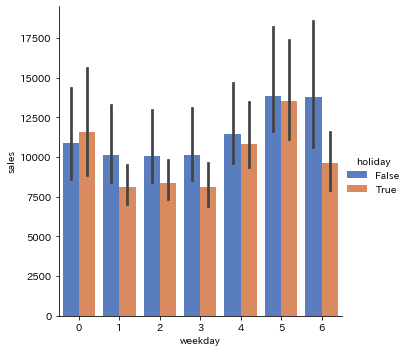

In [217]:
df_stateSales = df_validation.groupby(['state_id'])[ls_col_d].sum()
df_stateSales = pd.DataFrame(df_stateSales.stack(),columns=['sales'])
df_stateSales.index.names= [df_stateSales.index.names[0],'d']
df_stateSales = df_stateSales.reset_index()
df_stateSales['date'] = df_stateSales['d'].apply(lambda x : dct_d_to_dt[x])
del df_stateSales['d']

df_calendarAbbr = df_calendar[["date","Holiday_CA","Holiday_TX","Holiday_WI"]].rename(columns={"Holiday_CA":"CA","Holiday_TX":"TX","Holiday_WI":"WI"})
df_calendarAbbr = df_calendarAbbr.set_index('date')
df_calendarAbbr = pd.DataFrame(df_calendarAbbr.stack(),columns=['holiday'])
df_calendarAbbr.index.names= [df_calendarAbbr.index.names[0],'state_id']
df_calendarAbbr = df_calendarAbbr.reset_index()

df_stateSales = pd.merge(df_stateSales,df_calendarAbbr,on=['date','state_id'],how='left')
df_stateSales['weekday'] = df_stateSales.date.dt.weekday

df_stateSalesByHoli = pd.DataFrame(df_stateSales.groupby(['state_id','weekday','holiday'])['sales'].agg('mean'))
sns.catplot(x="weekday", y="sales", hue="holiday", data=df_stateSalesByHoli.reset_index(), kind="bar", palette="muted")

# Seasonal Check

In [196]:
df_validation_diff = df_validation[ls_col_d] - df_validation[ls_col_d].shift(axis=1)

In [53]:
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_dt})
df_filtered = df_filtered.set_index('index')

# adf　検定
# C : cont
# t : trend(n of t )
# n : not cont
print(sm.tsa.stattools.adfuller(df_filtered, regression="ctt") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="ct") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="c") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="nc") )
#adf, pvalue, usedlag, nobs, critical values,icbest
#　p >= 0.05なので、stationaryではない

(-3.1565028908034853, 0.226230667900783, 26, 1886, {'1%': -4.377284446425945, '5%': -3.83552486518311, '10%': -3.5552019004970554}, 35836.57393545339)
(-2.9210485544666125, 0.15550720625976866, 26, 1886, {'1%': -3.963578171201774, '5%': -3.4128204368231856, '10%': -3.1284220505916744}, 35836.24978244452)
(-1.5653733253318474, 0.500960436179774, 26, 1886, {'1%': -3.433822016251123, '5%': -2.8630736989499335, '10%': -2.567586484303047}, 35840.41220502006)
(0.9540848336575994, 0.9094409031614727, 26, 1886, {'1%': -2.5669264915788492, '5%': -1.9411433591842264, '10%': -1.6166799320751082}, 35841.358278581676)


In [77]:
# Difference series
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_dt})
df_filtered = df_filtered.set_index('index')
df_filtered = (df_filtered - df_filtered.shift(axis=0)).dropna()
print(sm.tsa.stattools.adfuller(df_filtered, regression="ctt") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="ct") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="c") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="nc") )

(-3.925224027521485, 0.03888874954302298, 7, 55, {'1%': -4.595673332832456, '5%': -3.9446062374154773, '10%': -3.6219299564237413}, 854.8527799664273)
(-6.735013232425082, 5.567808489761036e-08, 1, 61, {'1%': -4.115412397821844, '5%': -3.485092052154145, '10%': -3.170590307779065}, 854.1398052331058)
(-8.234339211464945, 5.945735122271505e-13, 0, 62, {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}, 854.1501370473281)
(-8.302675152962156, 6.679262351786368e-14, 0, 62, {'1%': -2.602744838709677, '5%': -1.9460766397569735, '10%': -1.6131357396529151}, 852.1501370476158)


In [83]:
# Difference series
df_filtered = copy.copy(df_validation)
df_filtered = df_filtered[ls_col_d].sum()

df_filtered = pd.DataFrame(df_filtered)
df_filtered = df_filtered.reset_index()
df_filtered = df_filtered.replace({'index':dct_d_to_dt})
df_filtered = df_filtered.set_index('index')
res = sm.tsa.stattools.acf(df_filtered)
df_filtered = df_filtered-res.seasonal()
df_filtered = (df_filtered - df_filtered.shift(axis=0)).dropna()
print(sm.tsa.stattools.adfuller(df_filtered, regression="ctt") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="ct") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="c") )
print(sm.tsa.stattools.adfuller(df_filtered, regression="nc") )

AttributeError: 'numpy.ndarray' object has no attribute 'seasonal'

In [84]:
res

array([1.        , 0.67343829, 0.30769032, 0.12300696, 0.11099073,
       0.27305928, 0.60329298, 0.80817465, 0.58965443, 0.24062532,
       0.05562425, 0.0419664 , 0.21391774, 0.54081881, 0.73643036,
       0.52701782, 0.19774976, 0.02288632, 0.02771706, 0.20503427,
       0.54122756, 0.7498498 , 0.55658404, 0.23072187, 0.06789934,
       0.07957228, 0.26050123, 0.60546121, 0.8163644 , 0.62491039,
       0.2974476 , 0.12739113, 0.10799573, 0.26760686, 0.58617639,
       0.76769215, 0.56406861, 0.23005925, 0.04432767, 0.02802585,
       0.18688685])

In [ ]:


print(sm.tsa.arma_order_select_ic(df_filtered, ic='aic', trend='nc'))

# ax = Ax(fig=fg,ax=fg.fig.add_subplot(2, 1, 1))
sm.graphics.tsa.plot_acf(df_filtered)

# ax = Ax(fig=fg,ax=fg.fig.add_subplot(2, 1, 2))
sm.graphics.tsa.plot_pacf(df_filtered)



/Users/macico/.pyenv/versions/3.7.6/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



array([ 1.        ,  0.06038133, -0.27648905, -0.26402141, -0.26773529,
       -0.25866319,  0.19247394,  0.64773305,  0.20116253, -0.25072067,
       -0.26237462, -0.28465978, -0.23899046,  0.20103558,  0.61994886,
        0.18363742, -0.23461587, -0.27489113, -0.26534977, -0.24428978,
        0.19594349,  0.61406479,  0.20454958, -0.24902597, -0.26572514,
       -0.25954281, -0.2524122 ,  0.20554722,  0.61608095,  0.20723298,
       -0.24016802, -0.22879716, -0.275268  , -0.24438246,  0.21016629,
        0.58959635,  0.20082385, -0.22660875, -0.25932836, -0.26953305,
       -0.26042799])

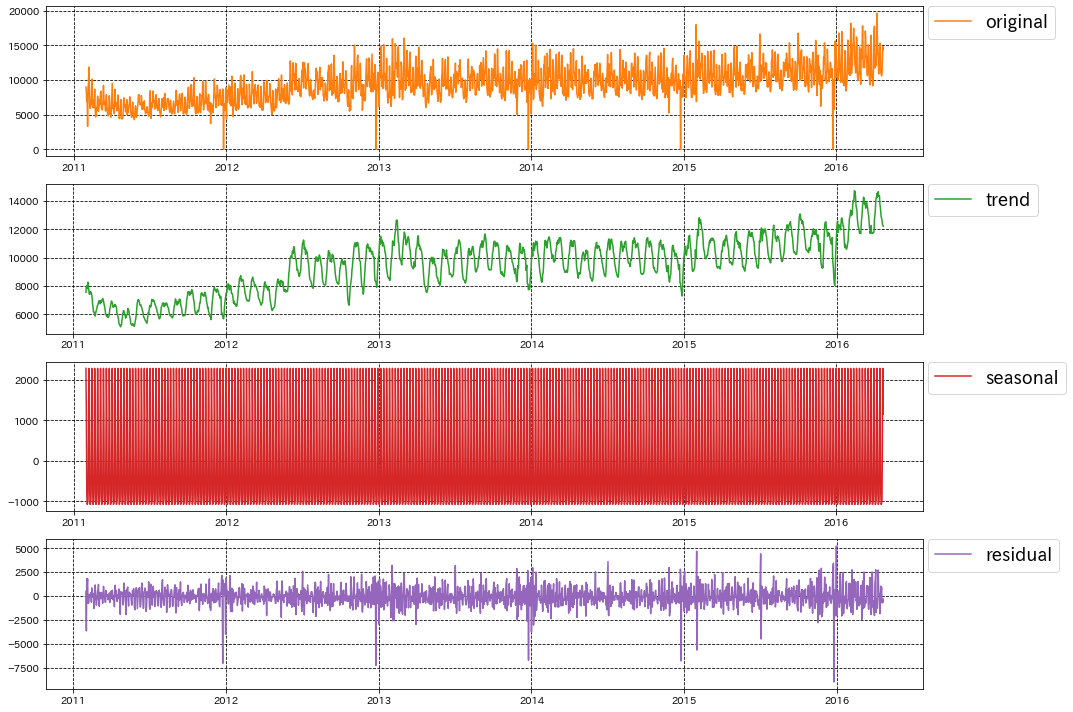

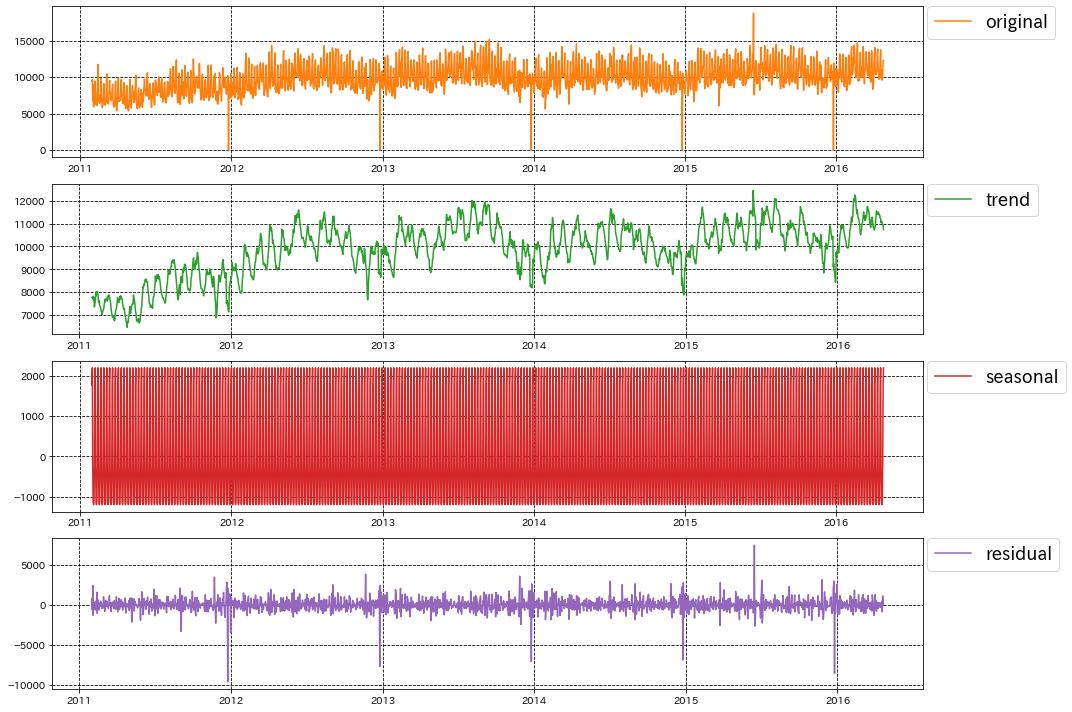

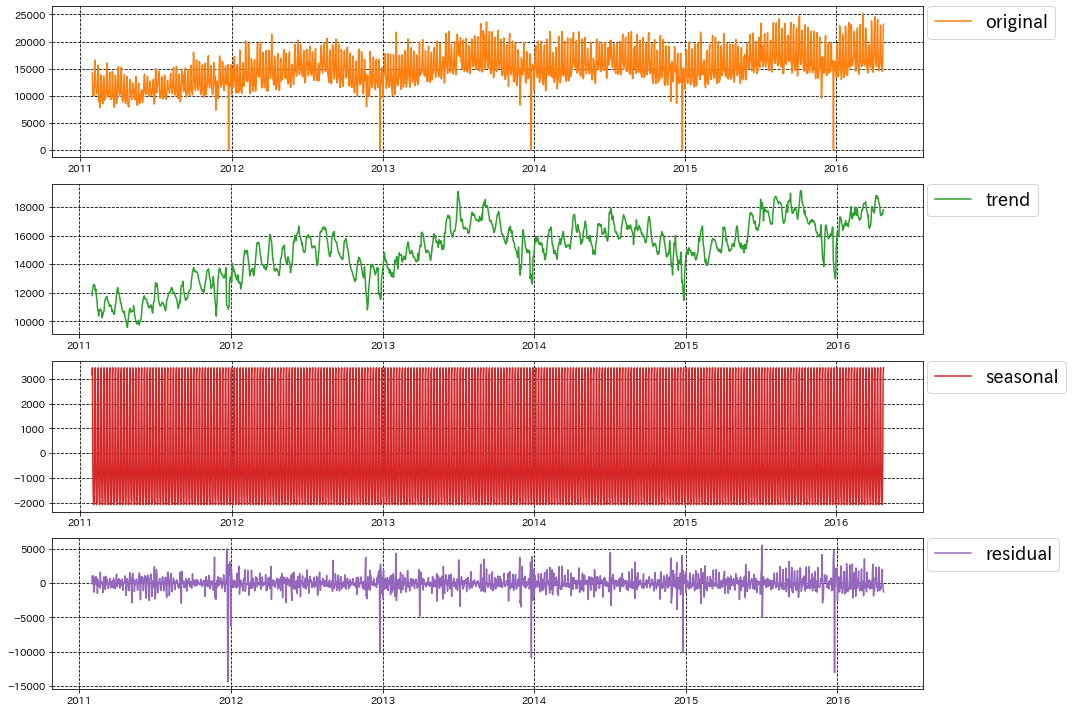

In [43]:

for _state in ls_state:
    fg = Fig(figsize=(15,10))

    df_filtered = df_validation[df_validation.state_id == _state]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')
    
#     ts = sm.tsa.seasonal_decompose(df_filtered.values, period=7)
    ts = sm.tsa.stattools.acf(passengers, nlags=4)
#     ts.plot()
#     print(ts.trend[10])

#     plt.plot(ts.trend) # トレンド成分
#     plt.plot(ts.seasonal) # 季節成分
#     plt.plot(ts.resid) # ノイズ成分
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 1))
    ax.plot_line(
        df_filtered.index,
        df_filtered.values,
        'original',color=ax.tab10(1)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 2))
    ax.plot_line(
        df_filtered.index,
        ts.trend,
        'trend',color=ax.tab10(2)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 3))
    ax.plot_line(
        df_filtered.index,
        ts.seasonal,
        'seasonal',color=ax.tab10(3)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 4))
    ax.plot_line(
        df_filtered.index,
        ts.resid,
        'residual',color=ax.tab10(4)
    )
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)


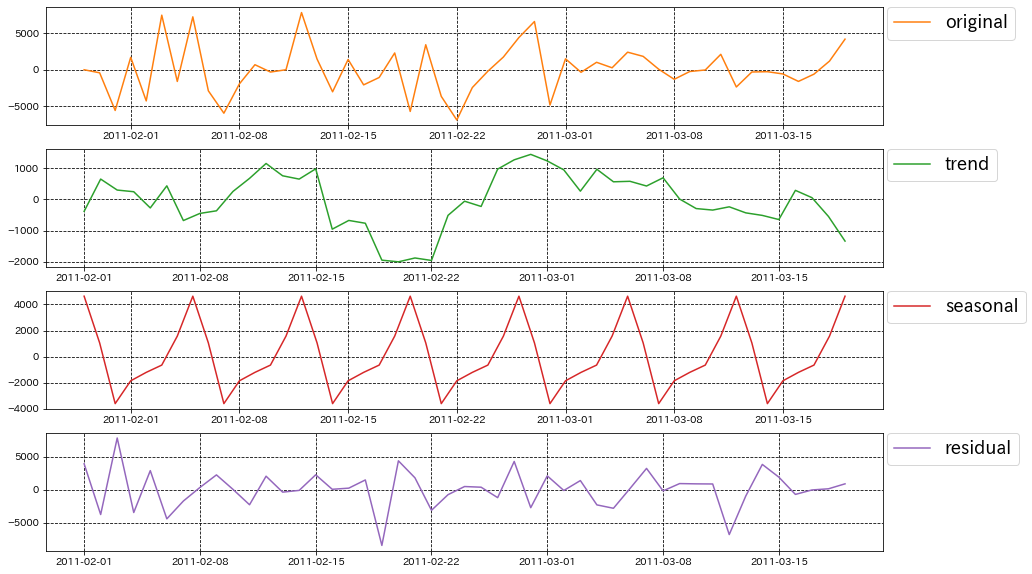

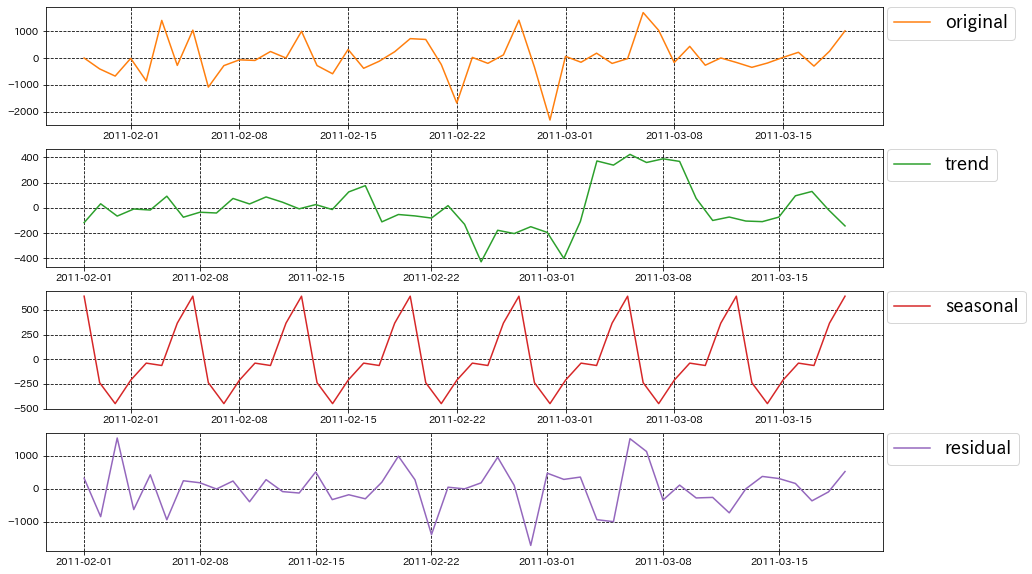

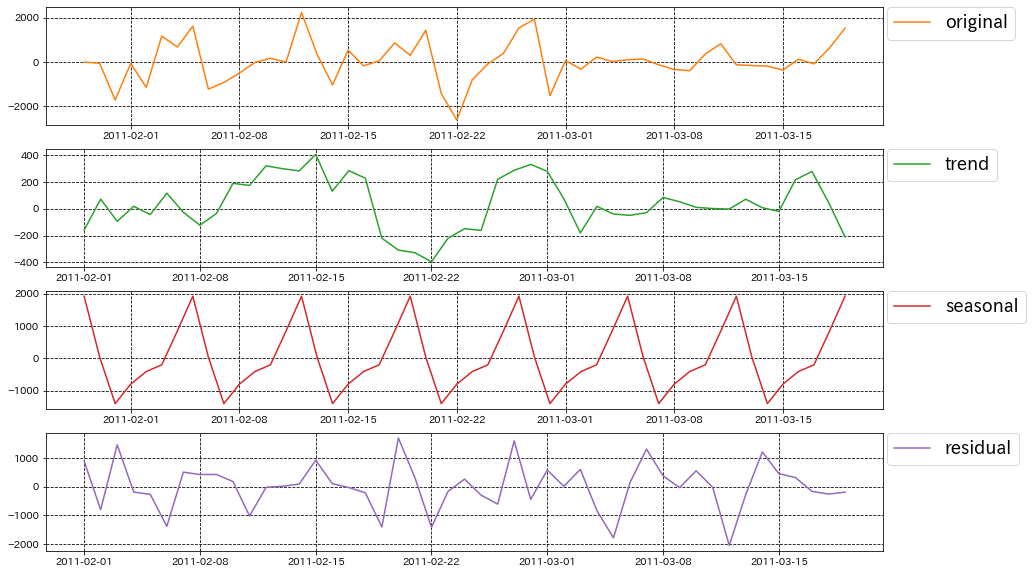

In [198]:

for _cat in ls_cat:
    fg = Fig(figsize=(15,10))

#     df_filtered = df_validation[df_validation.cat_id == _cat]
    df_filtered = df_validation_diff[df_validation.cat_id == _cat]
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_dt})
    df_filtered = df_filtered.set_index('index')
    
    ts = sm.tsa.seasonal_decompose(df_filtered.values, period=7)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 1))
    ax.plot_line(
        df_filtered.index[:50],
        df_filtered.values[:50],
        'original',color=ax.tab10(1)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 2))
    ax.plot_line(
        df_filtered.index[:50],
        ts.trend[:50],
        'trend',color=ax.tab10(2)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 3))
    ax.plot_line(
        df_filtered.index[:50],
        ts.seasonal[:50],
        'seasonal',color=ax.tab10(3)
    )
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)
    
    ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 4))
    ax.plot_line(
        df_filtered.index[:50],
        ts.resid[:50],
        'residual',color=ax.tab10(4)
    )
    
    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    ax.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=18)


In [35]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hare') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

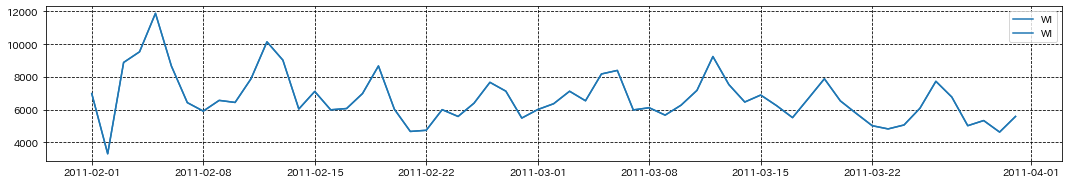

In [40]:
fg = Fig(figsize=(15,10))
ax = Ax(fig=fg,ax=fg.fig.add_subplot(4, 1, 1))

for _state in ls_state:

    df_filtered = df_validation[df_validation.state_id == _state] 
    df_filtered = df_filtered[ls_col_d].sum()
    
    df_filtered = pd.DataFrame(df_filtered)
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.replace({'index':dct_d_to_date})
    df_filtered = df_filtered.set_index('index')

#     df_filtered = df_filtered.resample(rule = 'M').sum()
    df_filtered = df_filtered["2011-02":"2011-3"]
    
    y = denoise_signal(df_filtered.values)

    ax.plot_line(
        df_filtered.index,
        y,
        _state,color=ax.tab10(ls_state.index(_state))
    )
    
    ax.plot_line(
        df_filtered.index,
        df_filtered.values,
        _state,color=ax.tab10(ls_state.index(_state))
    )

    ax.xticklabelsDateFormatter('%Y-%m-%d')

    ax.grid('x',True,color='black',linestyle='--')
    ax.grid('y',True,color='black',linestyle='--')
    break

ax.legend(loc='best')

In [106]:
ls_sale = y
# 自己相関
ls_sale_acf = sm.tsa.stattools.acf(ls_sale, nlags=40)

# 偏自己相関
ls_sale_pacf = sm.tsa.stattools.pacf(ls_sale, nlags=40, method='ols')


/Users/macico/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [195]:

df_validation

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]